In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print("Shape of train dataset ",train.shape )
print("Shape of test dataset ",test.shape )

Shape of train dataset  (381109, 12)
Shape of test dataset  (127037, 11)


In [4]:
train.head(3).append(train.tail(3))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
col = train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


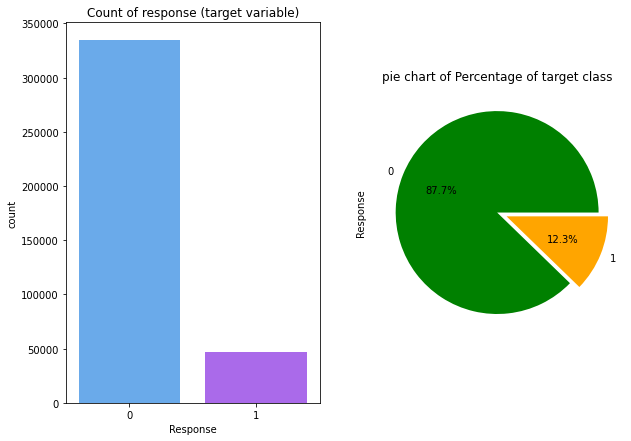

In [7]:
plt.subplot(1, 2, 1)
sns.countplot(train['Response'], palette="cool")
plt.title("Count of response (target variable)")

plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")

print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


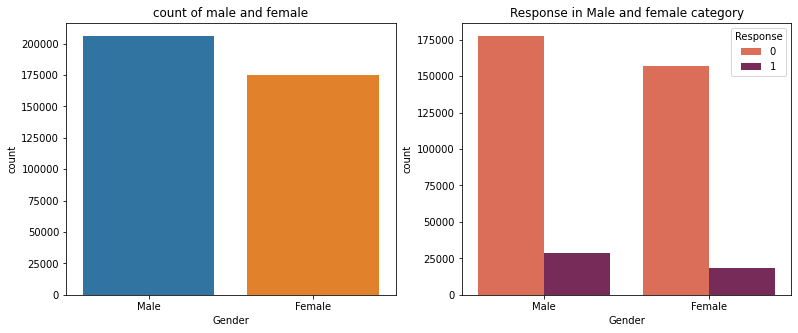

In [8]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Response'],palette="rocket_r")
plt.title("Response in Male and female category")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


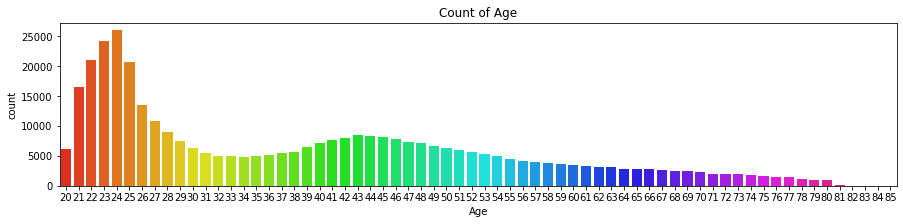

In [9]:
plt.figure(figsize = (15,3))
sns.countplot(train['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


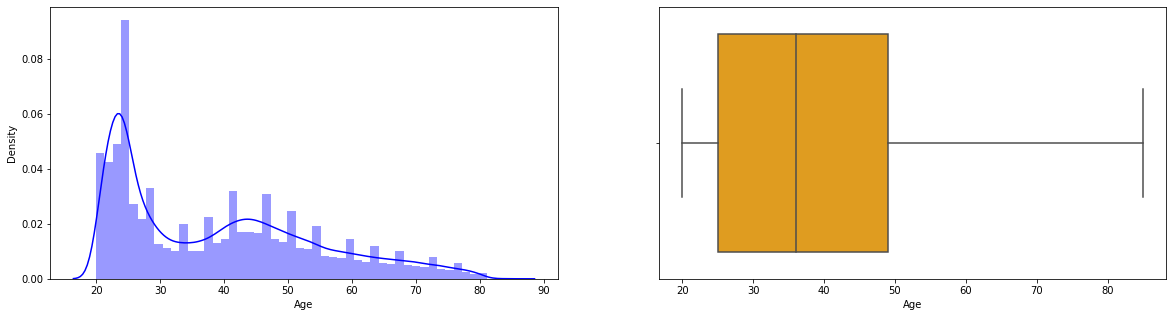

In [10]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(train['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(train['Age'],ax = axx[1],color='Orange')

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


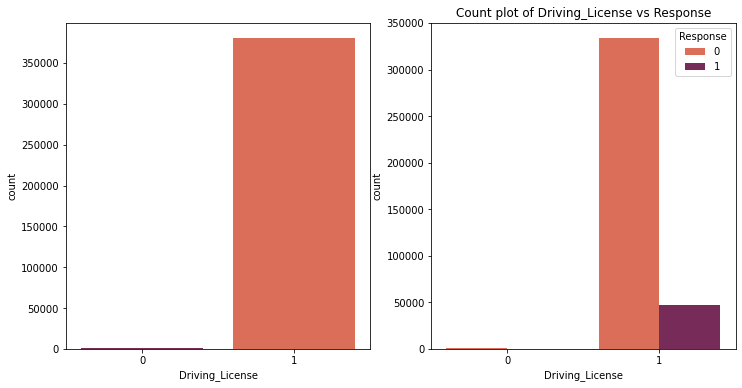

In [11]:
print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(train['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot('Driving_License', hue = 'Response',ax =axx[1],data = train,palette="rocket_r")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


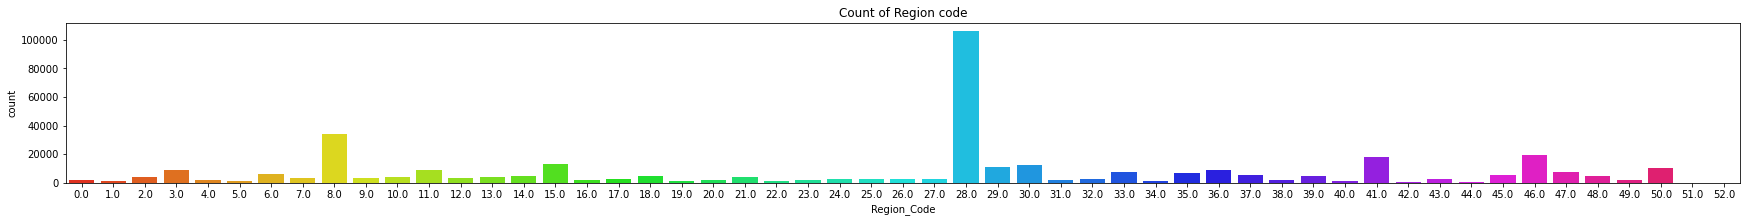

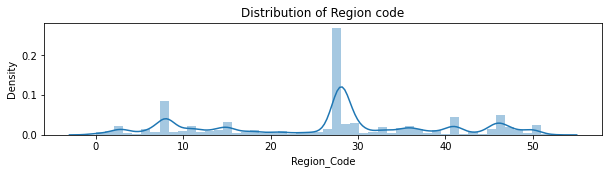

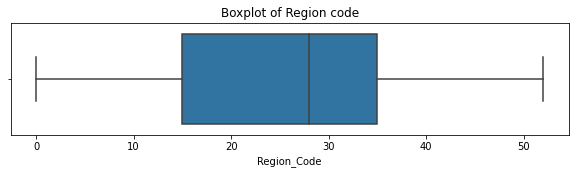

In [13]:
plt.figure(figsize = (30,10))
plt.subplot(3,1,1)
sns.countplot(train['Region_Code'], palette = 'hsv')
plt.title('Count of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()

Percentage ofPreviously_Insured feature
 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


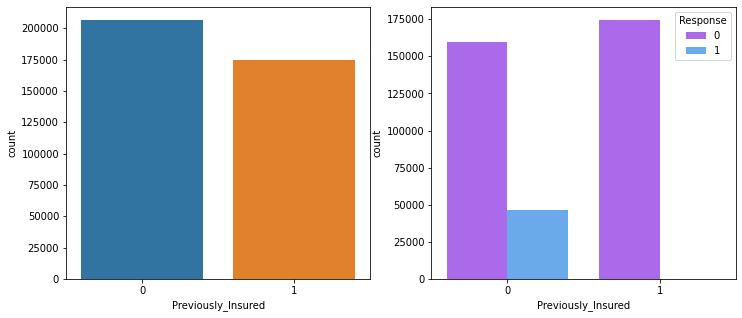

In [14]:
print("Percentage ofPreviously_Insured feature\n ")
print(train['Previously_Insured'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(train['Previously_Insured'],ax = axx[0])
sns.countplot('Previously_Insured', hue = 'Response',ax =axx[1],data = train,palette="cool_r")

Percentage of vechicle age feature
 
1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


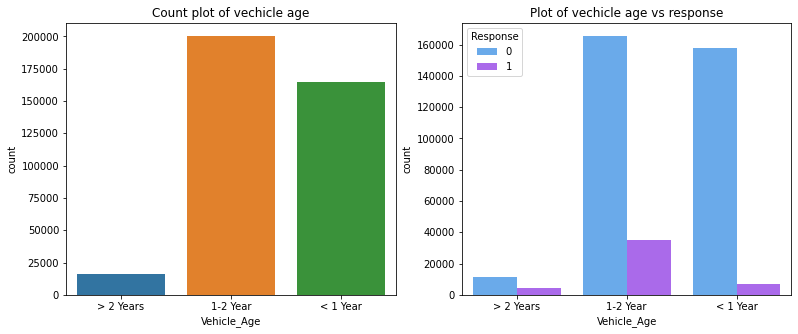

In [15]:
print("Percentage of vechicle age feature\n ")
print(train['Vehicle_Age'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("Count plot of vechicle age")
plt.subplot(1,2,2)
plt.title("Plot of vechicle age vs response")
sns.countplot('Vehicle_Age', hue = 'Response',data = train,palette="cool")

Percentage of vechicle damage feature
 
Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


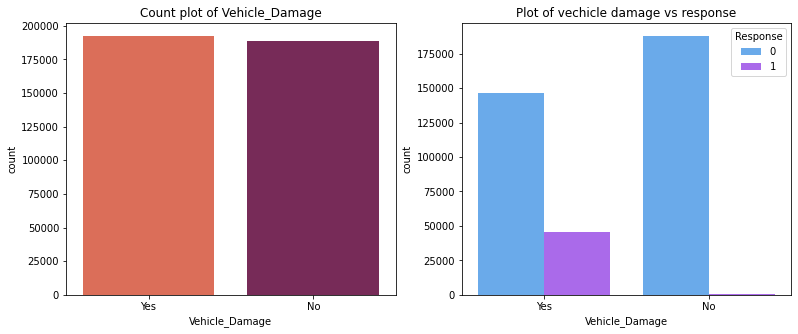

In [16]:
print("Percentage of vechicle damage feature\n ")
print(train['Vehicle_Damage'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'],palette="rocket_r")
plt.title("Count plot of Vehicle_Damage")
plt.subplot(1,2,2)
plt.title("Plot of vechicle damage vs response")
sns.countplot('Vehicle_Damage', hue = 'Response',data = train,palette="cool")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


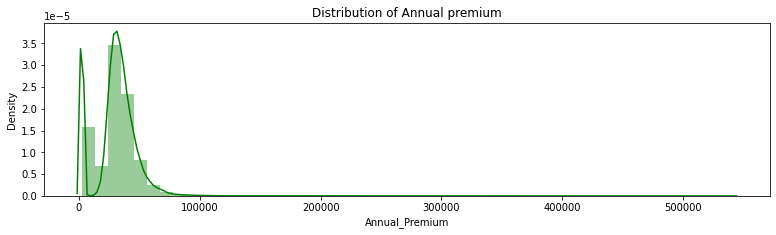

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


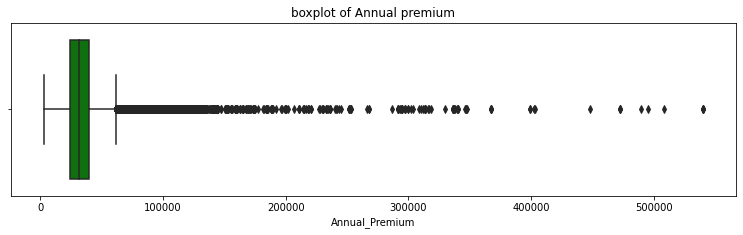

In [17]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(train['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
#print("-------------------------------------")
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


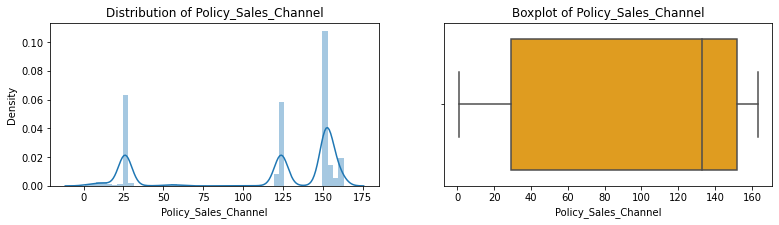

In [18]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(train['Policy_Sales_Channel'])

plt.subplot(1,3,2)
plt.title("Boxplot of Policy_Sales_Channel")
sns.boxplot(train['Policy_Sales_Channel'],color='Orange')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


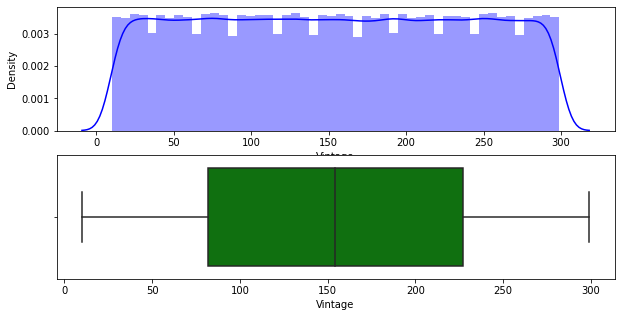

In [19]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))
axx = ax.flatten()
sns.distplot(train['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(train['Vintage'],ax=axx[1],color='green')

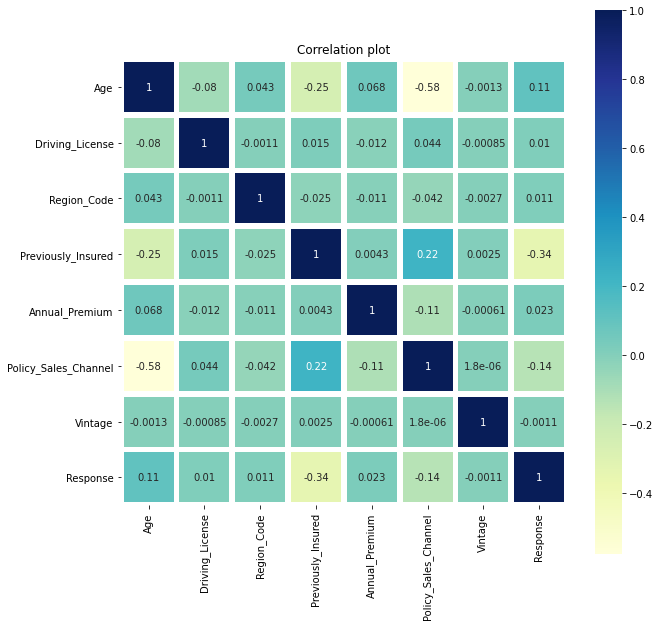

In [20]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train[col].corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['is_train'] = 1               
test['is_train'] = 0
test['Response'] = None
df = pd.concat((train,test))     
df.tail(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,None,0
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,None,0


In [22]:
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,1
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,1
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,1


In [23]:
df['Region_Code']=df['Region_Code'].astype(int)              
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)

In [24]:
train = df[df['is_train']==1]                             
test = df[df['is_train']==0]
train = train.drop(['is_train'],axis=1)              
test = test.drop(['is_train','Response'] ,axis=1)

train['Response'] = train['Response'].astype(int)  # Converting object to int
train.shape , test.shape

((381109, 12), (127037, 11))

In [25]:
col_1 = train.columns.tolist()
col_1.remove('id')
col_1.remove('Response')
cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 

X=train[col_1]
y=train['Response']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

In [28]:
pip install catboost

     |████████████████████████████████| 66.2MB 68kB/s 


In [29]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations= 500, depth= 9, border_count= 20,eval_metric = 'AUC')

cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))

0:	test: 0.8377188	best: 0.8377188 (0)	total: 528ms	remaining: 4m 23s
50:	test: 0.8549225	best: 0.8549225 (50)	total: 18.8s	remaining: 2m 45s
100:	test: 0.8577403	best: 0.8577403 (100)	total: 36.6s	remaining: 2m 24s
150:	test: 0.8584531	best: 0.8584531 (150)	total: 53.9s	remaining: 2m 4s
200:	test: 0.8587578	best: 0.8587578 (200)	total: 1m 11s	remaining: 1m 46s
250:	test: 0.8589401	best: 0.8589401 (250)	total: 1m 28s	remaining: 1m 27s
300:	test: 0.8590457	best: 0.8590464 (298)	total: 1m 44s	remaining: 1m 9s
350:	test: 0.8591015	best: 0.8591085 (348)	total: 2m	remaining: 51.2s
400:	test: 0.8591324	best: 0.8591596 (395)	total: 2m 17s	remaining: 33.9s
450:	test: 0.8591495	best: 0.8591596 (395)	total: 2m 35s	remaining: 16.9s
499:	test: 0.8591153	best: 0.8591775 (466)	total: 2m 53s	remaining: 0us

bestTest = 0.8591775481
bestIteration = 466

Shrink model to first 467 iterations.
CatBoost ROC AUC SCORE: 0.8591775480988667


In [30]:

from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)

lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=50,categorical_feature=cat_col,early_stopping_rounds= 50)


pred_proba = lgb.predict_proba(X_test)[:, 1]
print('Lightgbm ROC AUC SCORE: {}'.format(roc_auc_score(y_test, pred_proba)))

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.857213
[100]	valid_0's auc: 0.858086
[150]	valid_0's auc: 0.858412
[200]	valid_0's auc: 0.858603
[250]	valid_0's auc: 0.858637
[300]	valid_0's auc: 0.858695
[350]	valid_0's auc: 0.858755
Early stopping, best iteration is:
[327]	valid_0's auc: 0.858776
Lightgbm ROC AUC SCORE: 0.8587759402827547


In [31]:
from sklearn.model_selection import StratifiedKFold



lgb = LGBMClassifier(n_estimators=500,depth=5,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)            

fold = StratifiedKFold(n_splits = 5, shuffle =True)
pred = []
score =[]
for train_index , test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
   
    lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=100,categorical_feature=cat_col,early_stopping_rounds= 50)
    pred_proba = lgb.predict_proba(X_test)[:, 1]
    score.append(roc_auc_score(y_test, pred_proba))

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.85809
[200]	valid_0's auc: 0.858644
Early stopping, best iteration is:
[230]	valid_0's auc: 0.858763


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.859775
[200]	valid_0's auc: 0.86035
[300]	valid_0's auc: 0.860408
Early stopping, best iteration is:
[294]	valid_0's auc: 0.860421


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.85804
[200]	valid_0's auc: 0.858546
[300]	valid_0's auc: 0.858553
Early stopping, best iteration is:
[293]	valid_0's auc: 0.858583


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.857781
[200]	valid_0's auc: 0.858116
Early stopping, best iteration is:
[231]	valid_0's auc: 0.858143


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.855864
[200]	valid_0's auc: 0.856664
Early stopping, best iteration is:
[232]	valid_0's auc: 0.856723


In [32]:
print("Mean AUC ",np.array(score).mean())
print("Max AUC ", np.array(score).max())

Mean AUC  0.8585265195696223
Max AUC  0.8604211401485701


In [33]:
lgb= lgb.fit(X, y,eval_metric='auc',verbose=2,categorical_feature=cat_col)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [34]:
param = { 'depth':[3,1,2,6,4,8,9,10,20,30,50],
         'iterations':[250,100,500,1000],
         'learning_rate':[0.03,0.001,0.01,0.1,0.13,0.2,0.3],
         'l2_leaf_reg':[3,1,5,10,100],
         'border_count':[32,5,10,20,100,200]
        }

In [35]:
"""
from sklearn.model_selection import RandomizedSearchCV

randm = RandomizedSearchCV(cat, param_distributions = param, cv=5,refit = True,n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
 """
print("The best parameters across ALL searched params:{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 9, 'border_count': 20}")

The best parameters across ALL searched params:{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 9, 'border_count': 20}


In [37]:
pip install eli5

     |████████████████████████████████| 112kB 13.0MB/s 


In [38]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgb, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0131 ± 0.0004,Age
0.0130 ± 0.0002,Region_Code
0.0103 ± 0.0002,Vehicle_Age
0.0014 ± 0.0003,Gender
0.0013 ± 0.0005,Annual_Premium
0.0013 ± 0.0004,Vintage
0.0005 ± 0.0000,Driving_License
-0.0181 ± 0.0007,Policy_Sales_Channel
-0.0607 ± 0.0011,Vehicle_Damage
-0.0637 ± 0.0005,Previously_Insured


In [39]:
pred_cat = cat.predict_proba(test[col_1])[:,1]
pred_lgb = lgb.predict_proba(test[col_1])[:,1]     

w1 = 0.8                    # higher weights for the catboost because from different submission catboost gave better score than lgbm
w2 = 0.2                    # Tried with different weights for lgbm and catboost and found this pair of optimal values 

final = (1/2)*((w1*pred_cat) + (w2*pred_lgb))       
submit = pd.DataFrame({'id': test.id, 'Response': final})
submit.to_csv('Final.csv', index=False)